<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <table>
                    <tr>
                        <td>
                            <img src="Heart.png" style="max-width: 60px; display: block;">
                        </td>
                        <td>
                            <font color="#ff0000" size="5px">
                                <b>Heart Disease Analysis and Predictions
</b>
                            </font>
                        </td>
                    </tr>
                </table>
            </div>
            <p style="text-align:center; margin-top: 10px;">
                <span style="color: #ff0000;">Copyright (©)  Vengatesan-K. All Rights Reserved.</span>
            </p>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="5%">
            <img src="https://tse3.mm.bing.net/th?id=OIP.Me24yHjzo8uEtQrHYKnq3gHaHa&pid=Api&P=0&h=180">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Diagnosing Heart Disease</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

> <span style="font-family:Comic Sans MS"> 🎯 Aims to develop a predictive model for heart disease detection using a dataset containing various physiological and clinical attributes of individuals.</span> 

> <span style="font-family:Comic Sans MS"> 🎯 The primary objective is to create a machine learning model that can accurately predict the likelihood of an individual having heart disease based on their characteristics and medical data.</span>

<table align="left">
    <tr>
        <td width="4%">
            <img src="https://qvcc.edu/wp-content/uploads/2017/08/information-clipart-information-icon-1024x1024@2x.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>About Features</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

|S.No|Features|Detail|
|------|------|------|
|1    | Age|   Refers to the numerical representation of a person's age in years.    |
|2    |Sex|   Typically represents the gender of an individual, often encoded as binary values (0 for female, 1 for male).   |
|3    |ChestPainType|   Categorization of chest pain experienced by individuals, often classified into categories like typical angina, atypical angina, non-anginal pain, and asymptomatic.|
|4    |RestingBP|Stands for Resting Blood Pressure and represents the blood pressure of an individual measured at rest in millimeters of mercury (mmHg).|
|5    | Cholesterol	|Denotes the level of cholesterol in the blood, usually measured in milligrams per deciliter (mg/dL). |
|6    |FastingBS|Stands for Fasting Blood Sugar and represents the blood sugar level of an individual after fasting, typically measured in milligrams per deciliter (mg/dL)  |
|7    |RestingECG|Resting Electrocardiographic Results, detailing the electrical activity of the heart at rest, often classified into different categories such as normal, abnormal ST-T wave, and hypertrophy.|
|8    |MaxHR| Maximum Heart Rate and represents the highest heart rate achieved by an individual during an exercise test, measured in beats per minute (bpm). |
|9    | ExerciseAngina |Exercise-Induced Angina, indicating whether an individual experiences chest pain during exercise, often represented as a binary value (0 for no, 1 for yes). |
|10     |	Oldpeak	|ST depression induced by exercise relative to rest, providing insights into the heart's activity during exercise.   |
|11   | ST_Slope |Refers to the slope of the peak exercise ST segment, which describes the heart rate change during exercise and recovery.  |
|12     |	HeartDisease    |Typically denotes the presence or absence of heart disease, often encoded as a binary value (0 for absence, 1 for presence) in the heart disease prediction dataset.    |

<table align="left">
    <tr>
        <td width="4%">
            <img src="https://icons.veryicon.com/png/o/system/hywf-background-icon/import-37.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import Libraries</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Vengatesan-K/Heart-Disease-Prediction/main/heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

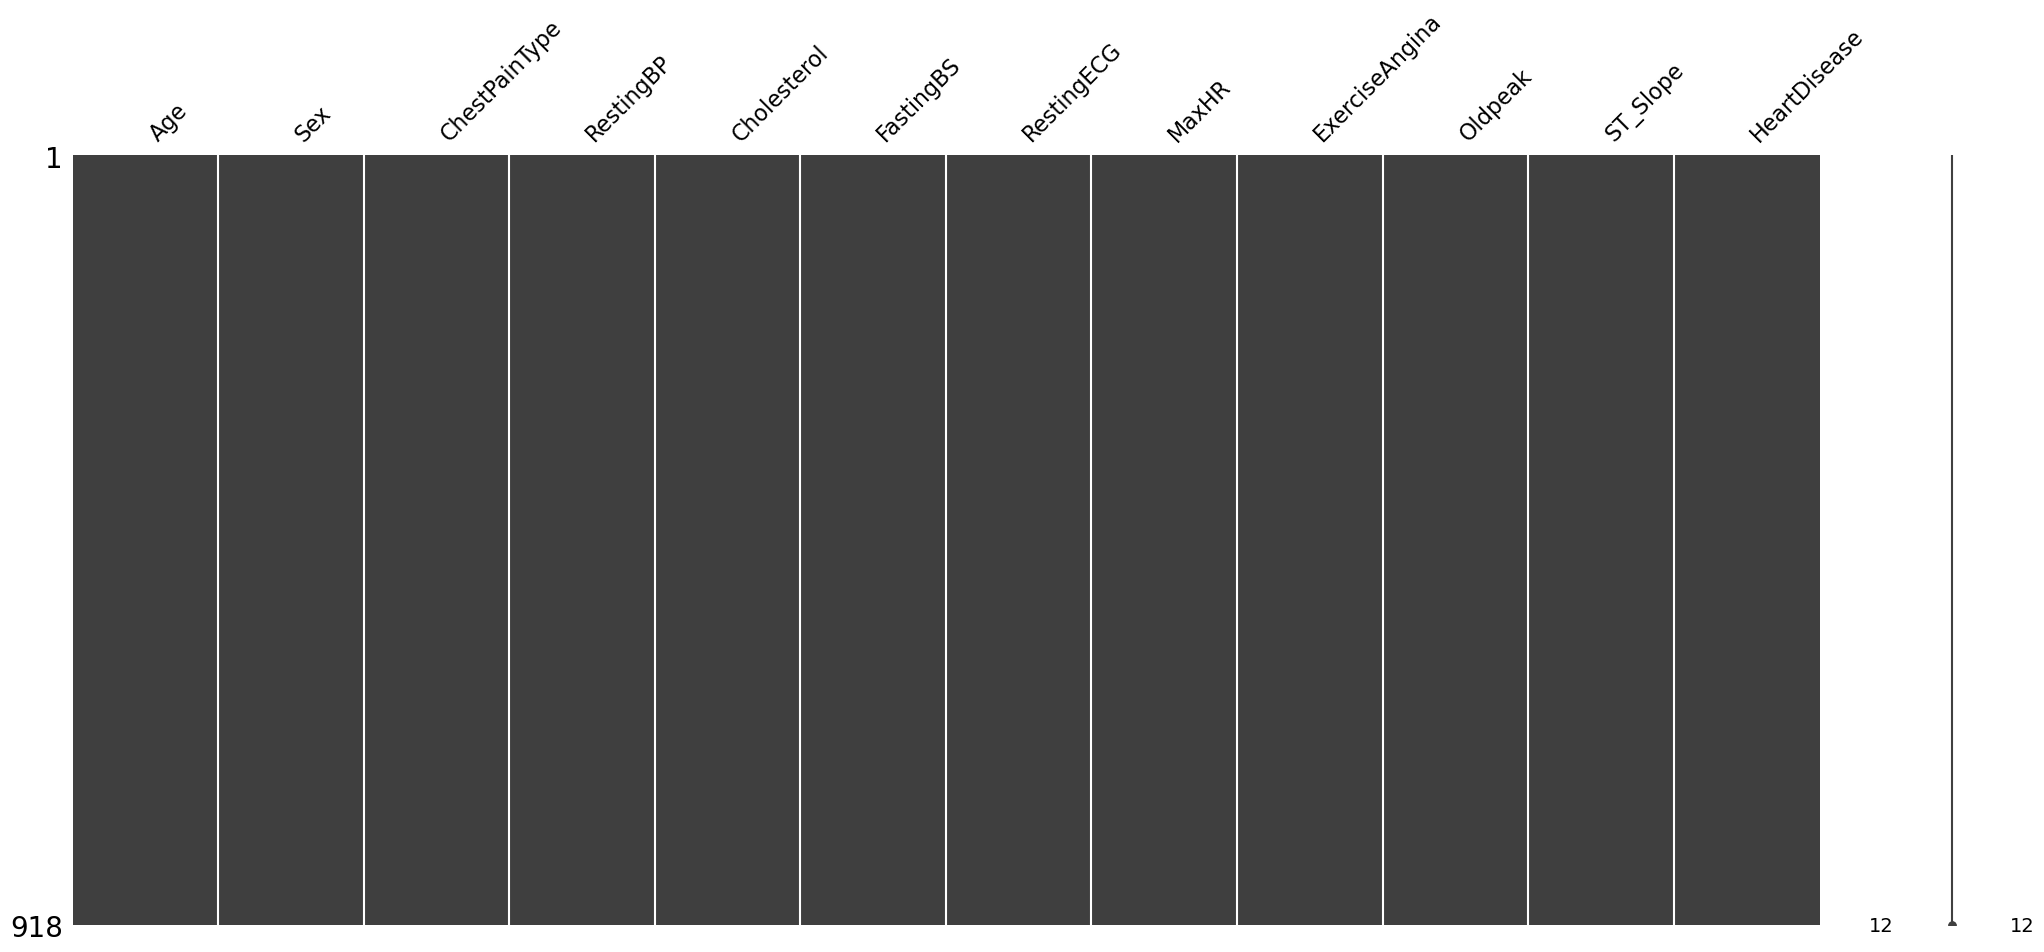

In [7]:
msno.matrix(df)

In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [10]:
df['HeartDisease'].replace(to_replace={0:'No',1:'Yes'},inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
58,54,M,ASY,150,365,0,ST,134,N,1.0,Up,No


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No


In [12]:
df['FastingBS'].replace(to_replace={0:'No',1:'Yes'},inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
458,61,M,ASY,134,0,Yes,ST,86,N,1.5,Flat,Yes


In [13]:
df['FastingBS'].value_counts(),df['HeartDisease'].value_counts()

(No     704
 Yes    214
 Name: FastingBS, dtype: int64,
 Yes    508
 No     410
 Name: HeartDisease, dtype: int64)

In [14]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [15]:
df.FastingBS.value_counts()

No     704
Yes    214
Name: FastingBS, dtype: int64

In [16]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [17]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [18]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [19]:
df.HeartDisease.value_counts()

Yes    508
No     410
Name: HeartDisease, dtype: int64

In [20]:
# percentage of split between the categorical values
df.HeartDisease.value_counts(normalize=True)
# About 55% of the data is about people who have heart disease (Class - 1) 
# and remaining 45% of the data is about who didn't have heart disease (Class -0)

Yes    0.553377
No     0.446623
Name: HeartDisease, dtype: float64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [22]:
from scipy import stats
from statsmodels.api import qqplot
numberical_columns = ['Age', 'RestingBP', 'Cholesterol', 
                      'MaxHR', 'Oldpeak']
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                       'ExerciseAngina', 'ST_Slope', 'HeartDisease']

#### Identify Variable Types

In [23]:
import pandas as pd

def identify_variable_types(df, unique_threshold=10, id_vars=[]):
    discrete_columns = []
    categorical_columns = []
    continuous_columns = []
    other_columns = id_vars.copy()

    df = df.drop(columns=other_columns)

    for column in df.columns:
        dtype = df[column].dtype
        unique_count = df[column].nunique()

        if dtype == 'object':
            if unique_count <= unique_threshold:
                categorical_columns.append(column)
            else:
                other_columns.append(column)
        elif pd.api.types.is_numeric_dtype(dtype):
            if unique_count <= unique_threshold:
                discrete_columns.append(column)
            else:
                continuous_columns.append(column)
        else:
            other_columns.append(column)

    print("Discrete_Columns:", discrete_columns)
    print("Categorical_Columns:", categorical_columns)
    print("Continuous_Columns:", continuous_columns)
    print("Other_Columns:", other_columns)

    return discrete_columns, categorical_columns, continuous_columns, other_columns

In [24]:
discrete, categorical, continuous, other = identify_variable_types(df)

Discrete_Columns: []
Categorical_Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Continuous_Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Other_Columns: []


### Categorial Columns

In [25]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

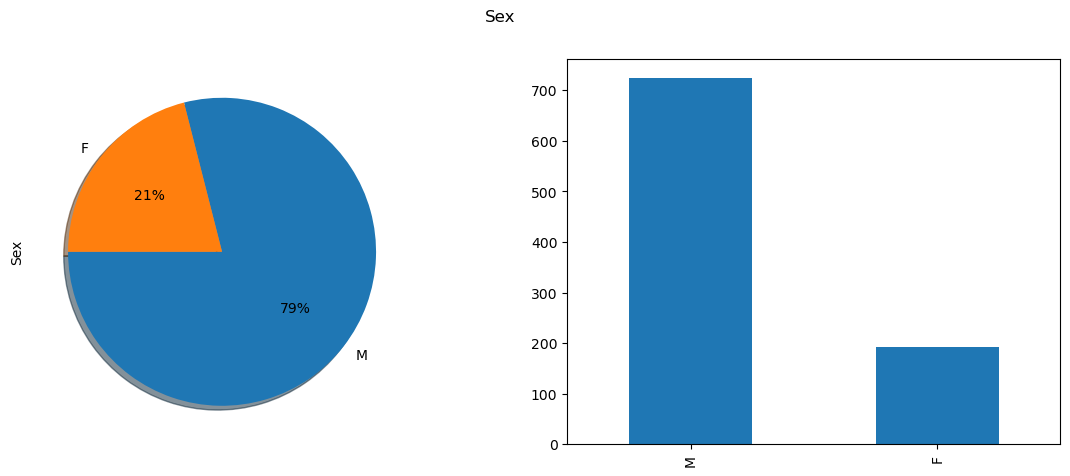

In [31]:
plot_categorial(categorical[0])

<div class="alert alert-block alert-info">
<b>Observation :</b> Males are consistenly more likely to have heart disease.</div>

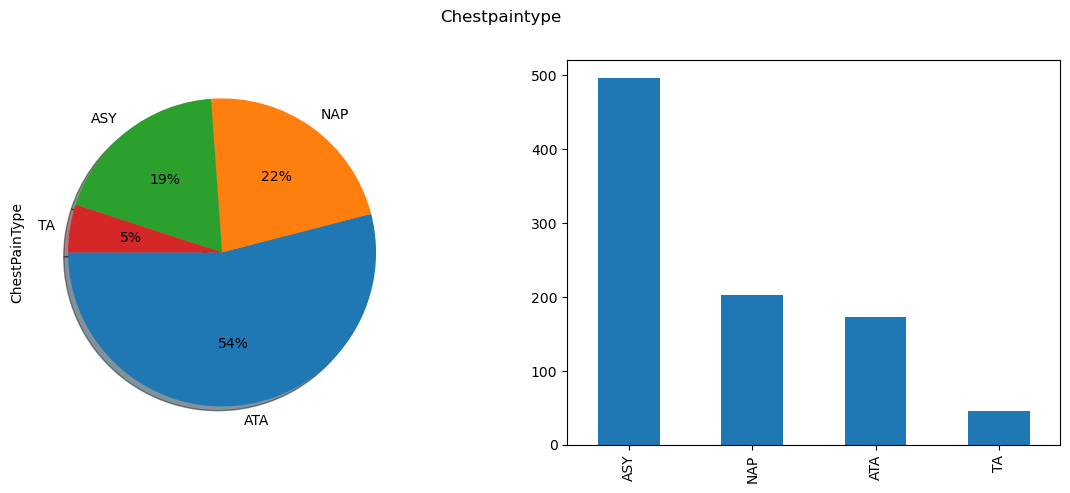

In [37]:
plot_categorial(categorical[1])

<div class="alert alert-block alert-info">
<b>Observation :</b> Inidividuals with ASY chest pain are consistently more likely to have heart disease.</div>

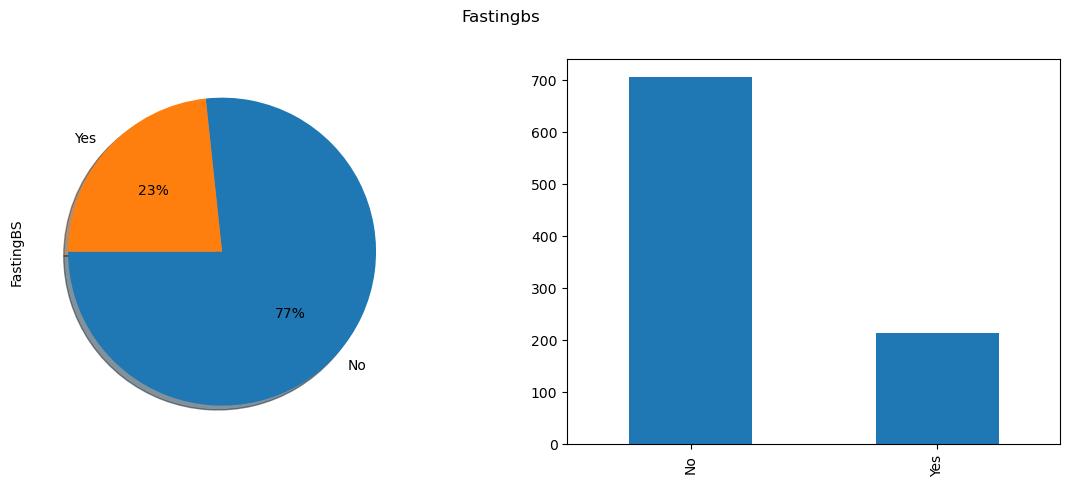

In [38]:
plot_categorial(categorical[2])

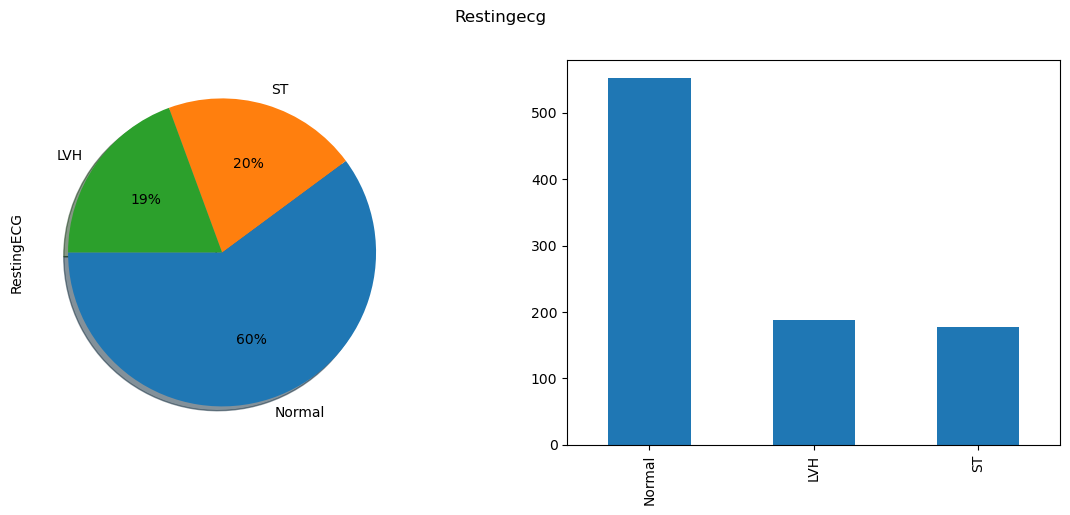

In [39]:
plot_categorial(categorical[3])

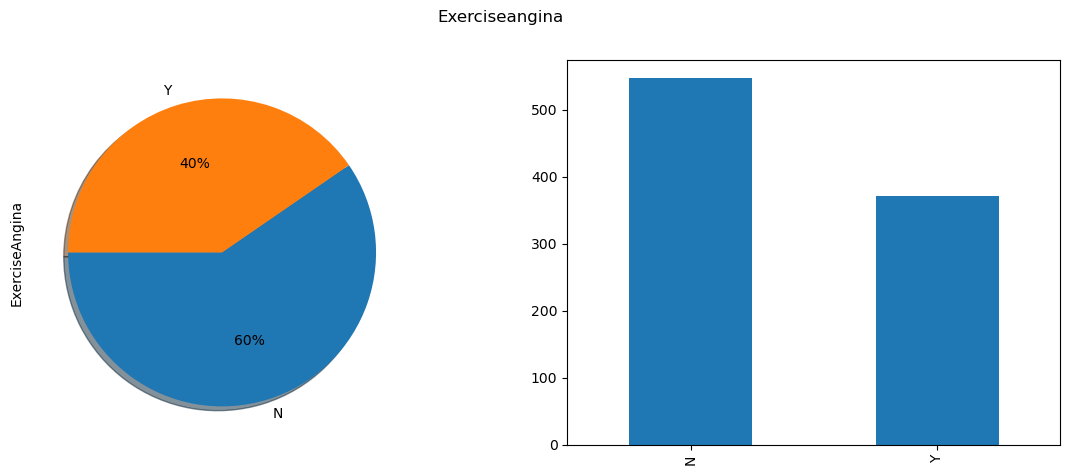

In [40]:
plot_categorial(categorical[4])

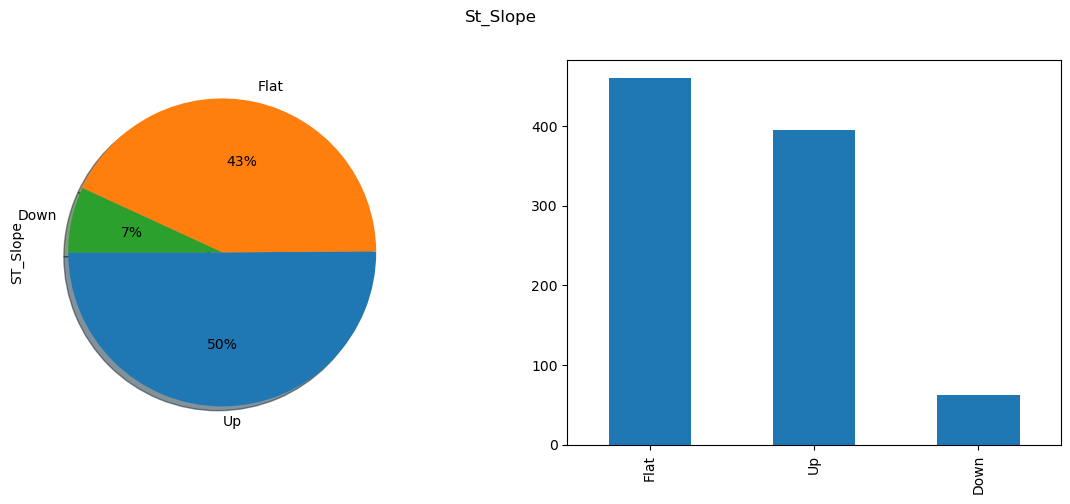

In [41]:
plot_categorial(categorical[5])

<div class="alert alert-block alert-info">
<b>Observation :</b> Flat and down ST_Slope have higher HeartDisease rate while Up ST_Slope has lower HeartDisease rate.</div>

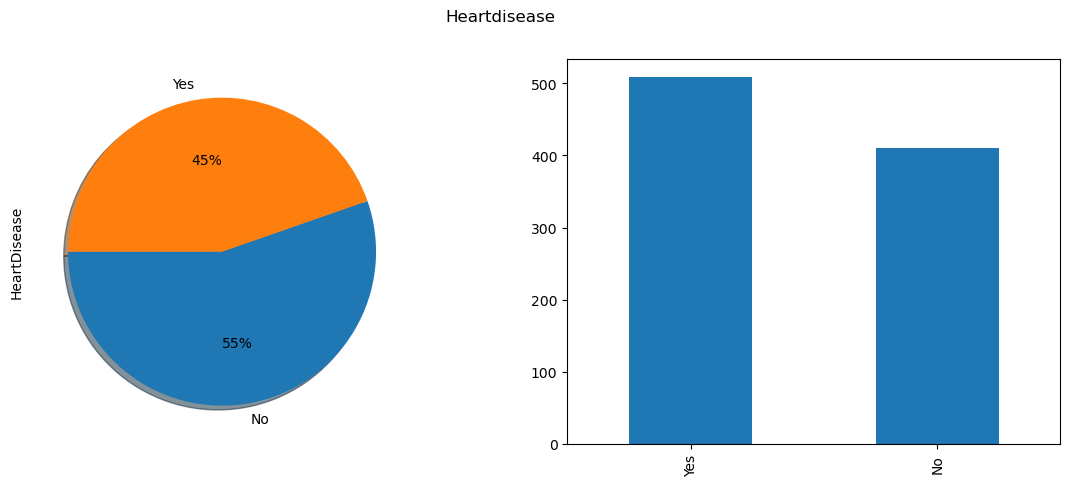

In [42]:
plot_categorial(categorical[6])

### Continous Columns

In [26]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

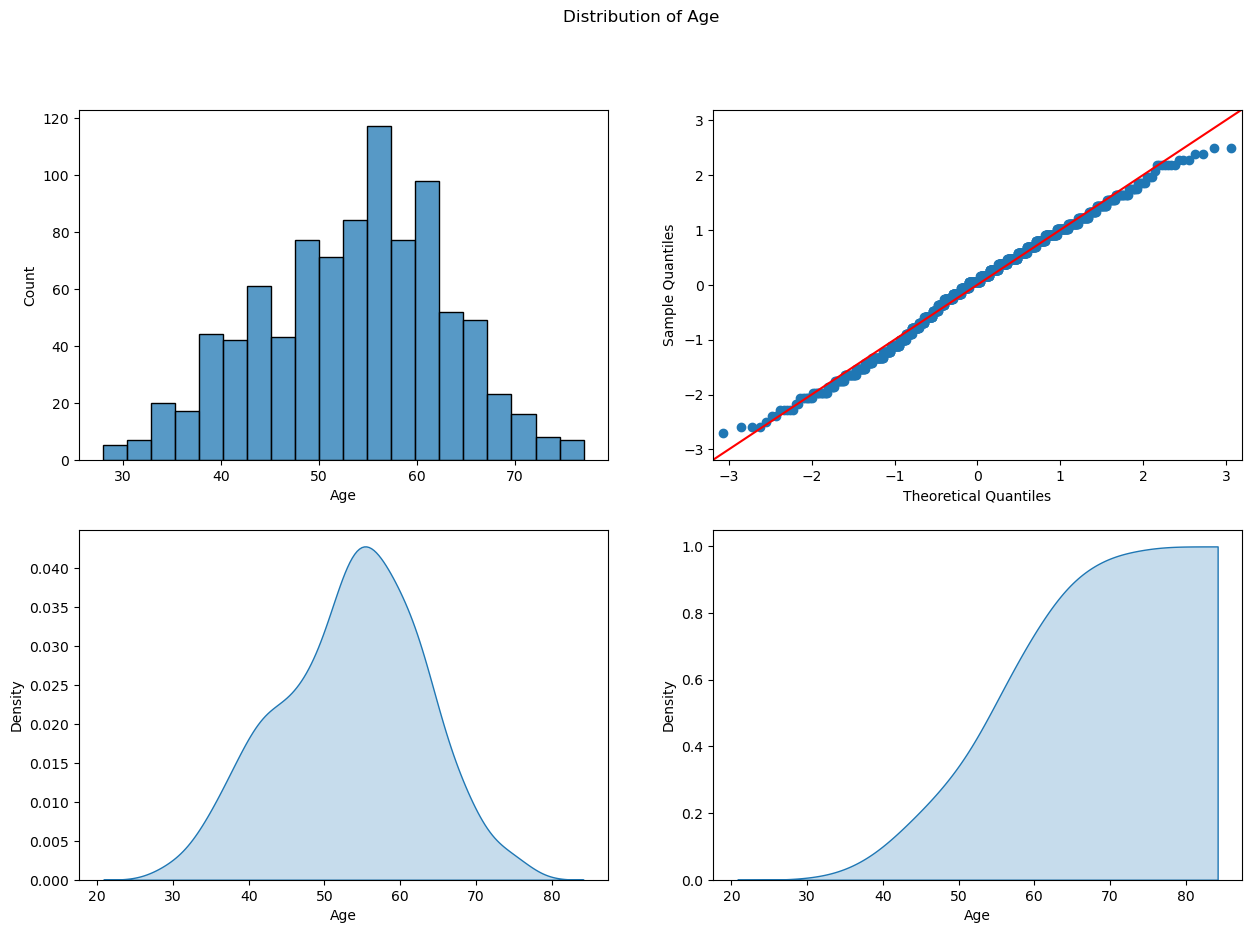

In [33]:
plot_distribution(continuous[0])

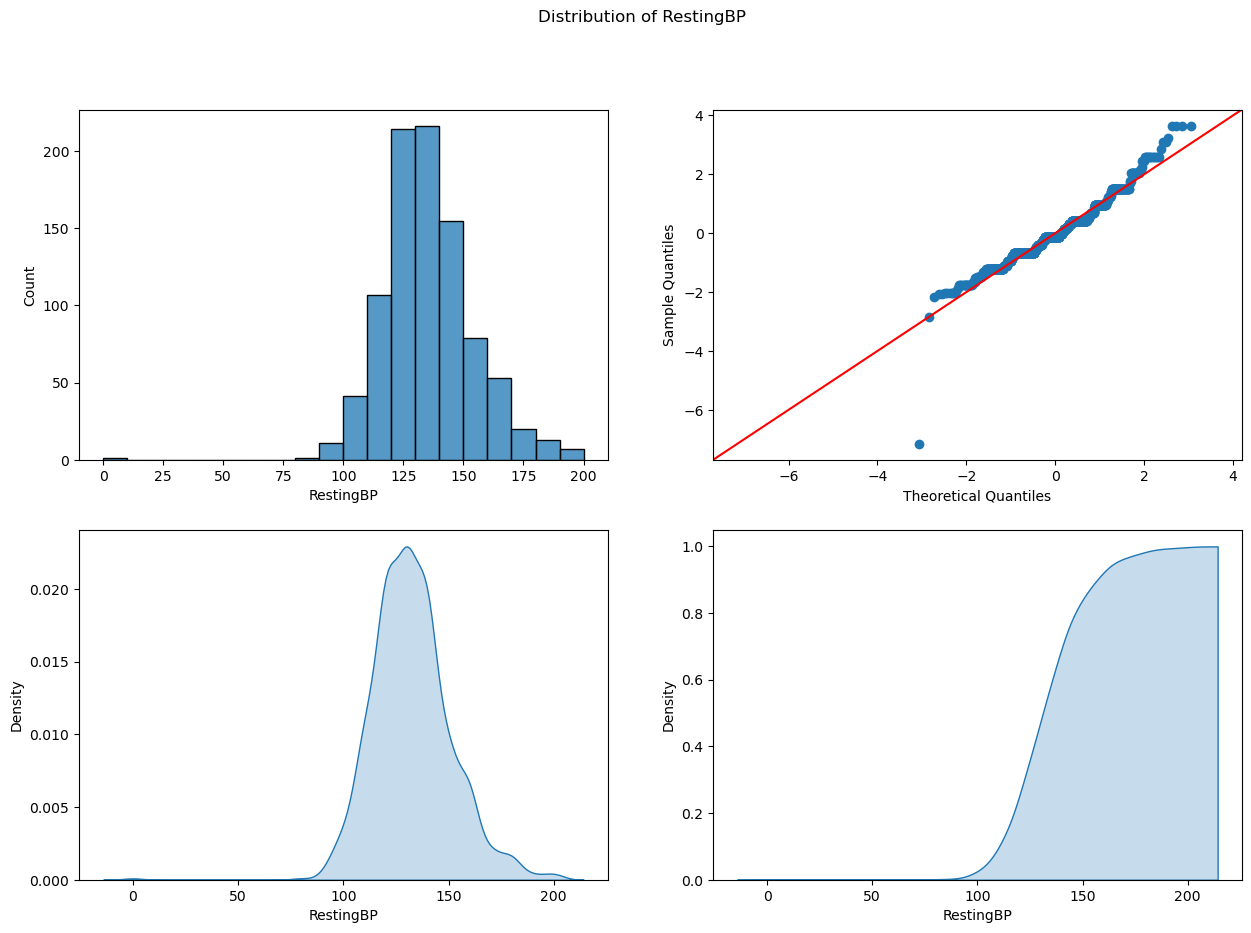

In [44]:
plot_distribution(continuous[1])

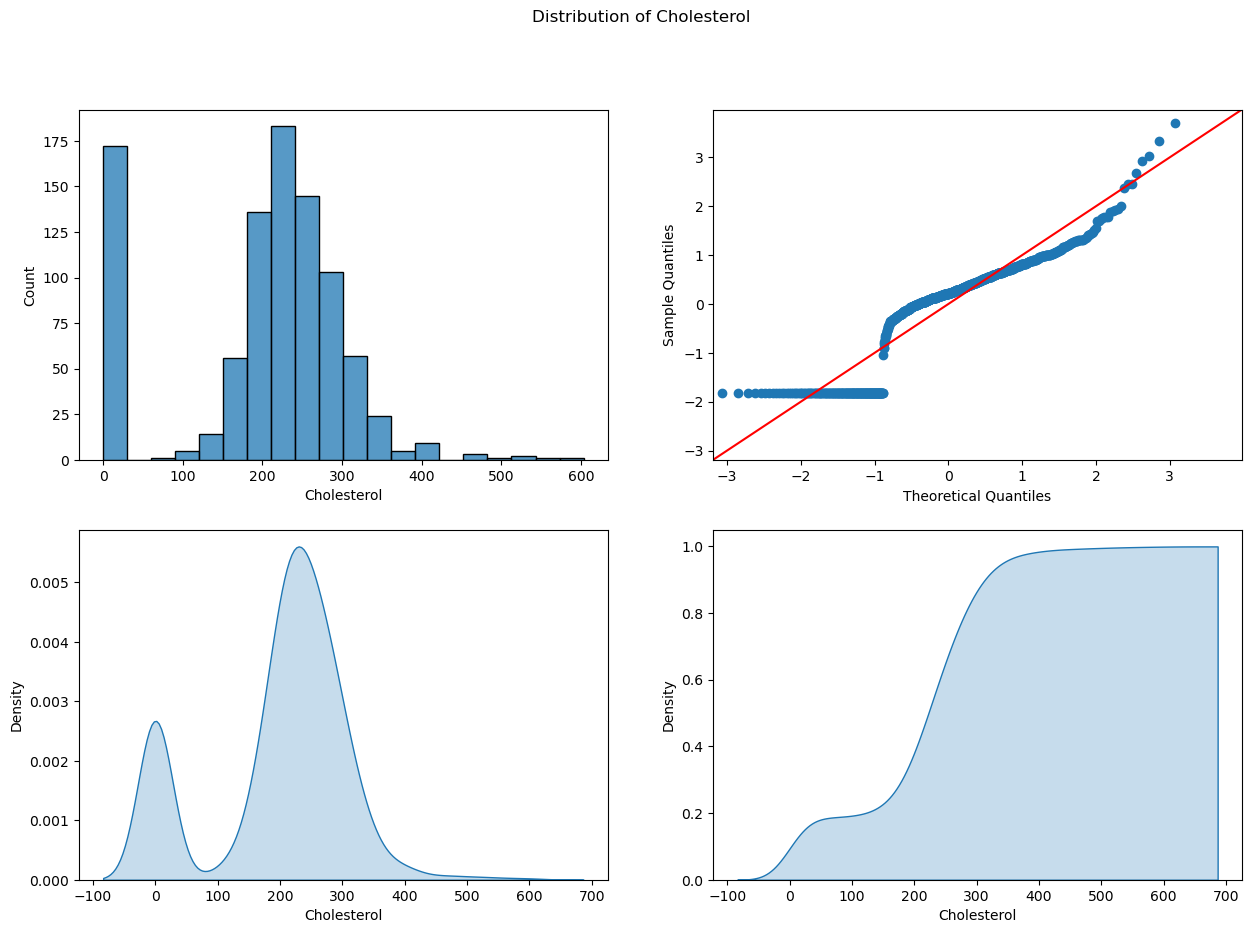

In [45]:
plot_distribution(continuous[2])

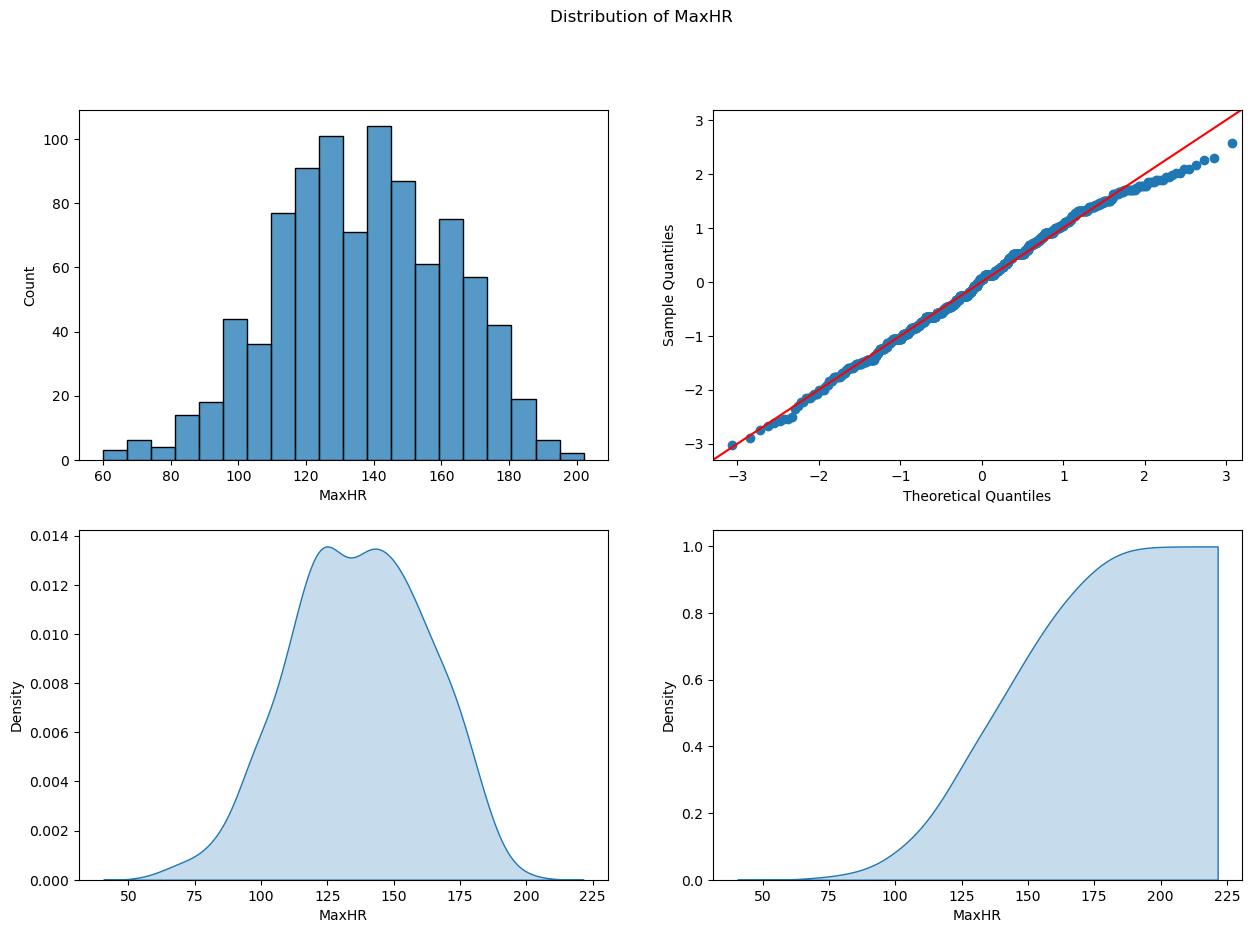

In [46]:
plot_distribution(continuous[3])

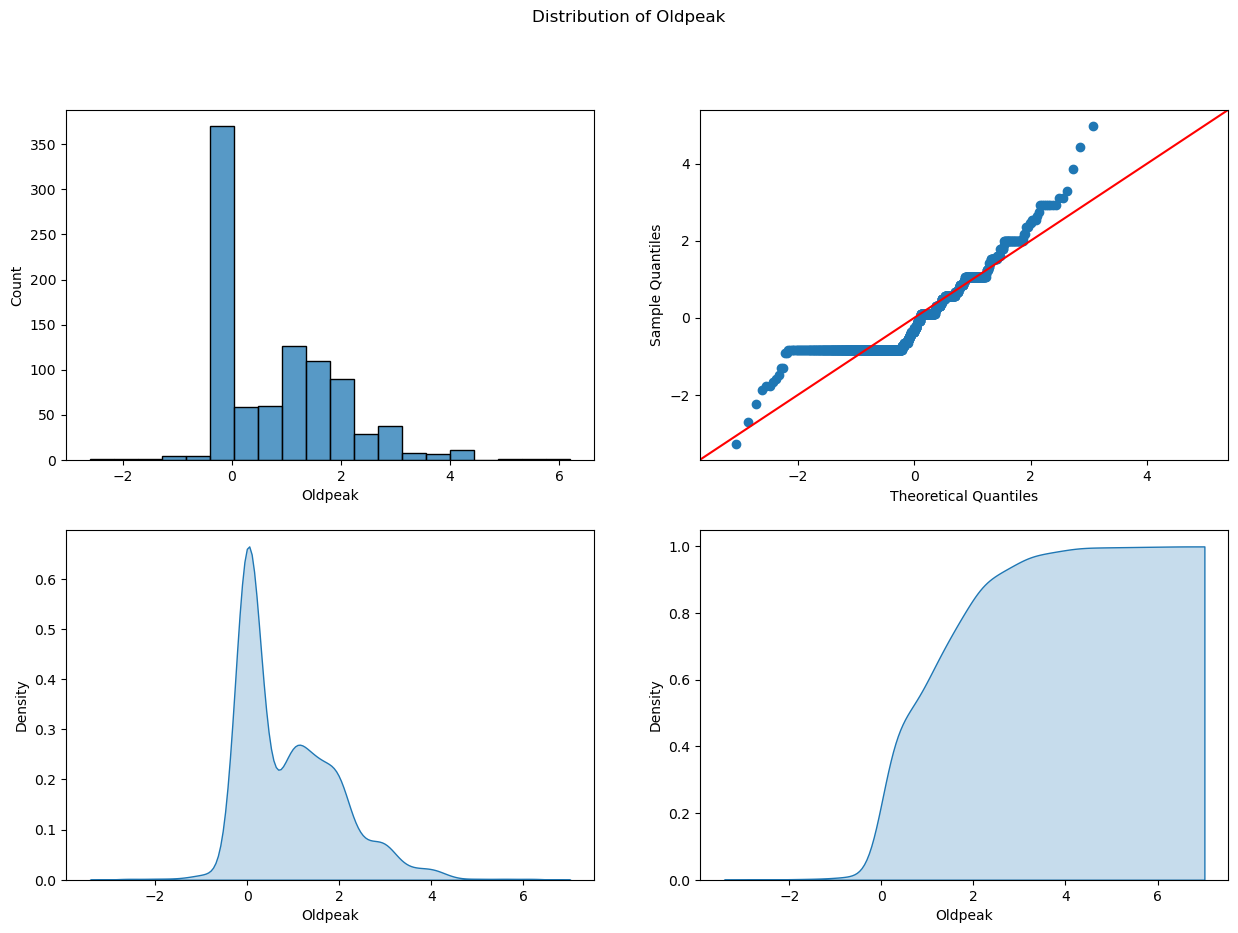

In [47]:
plot_distribution(continuous[4])

#### Statistical Plots (Box/Violin/Swarmplot/Bar)

In [34]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[0][0], palette="viridis_r"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[0][1], split=True, palette="viridis_r"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[1][0], palette="viridis_r"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="HeartDisease", data=df, hue="HeartDisease", palette="viridis_r"
    )  # displays barplot of the given dataframe column respect to 'HeartDisease' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

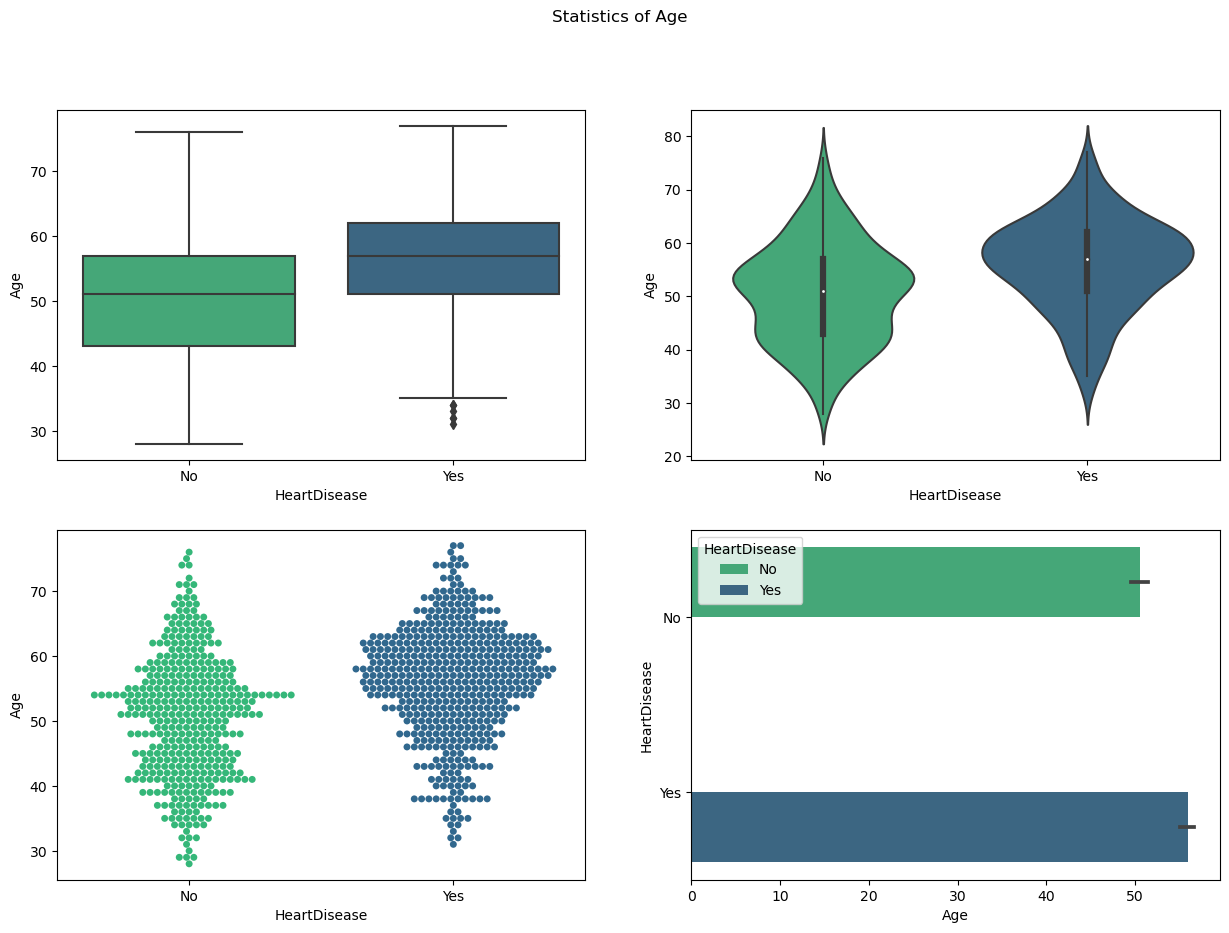

In [51]:
plot_stats(continuous[0])

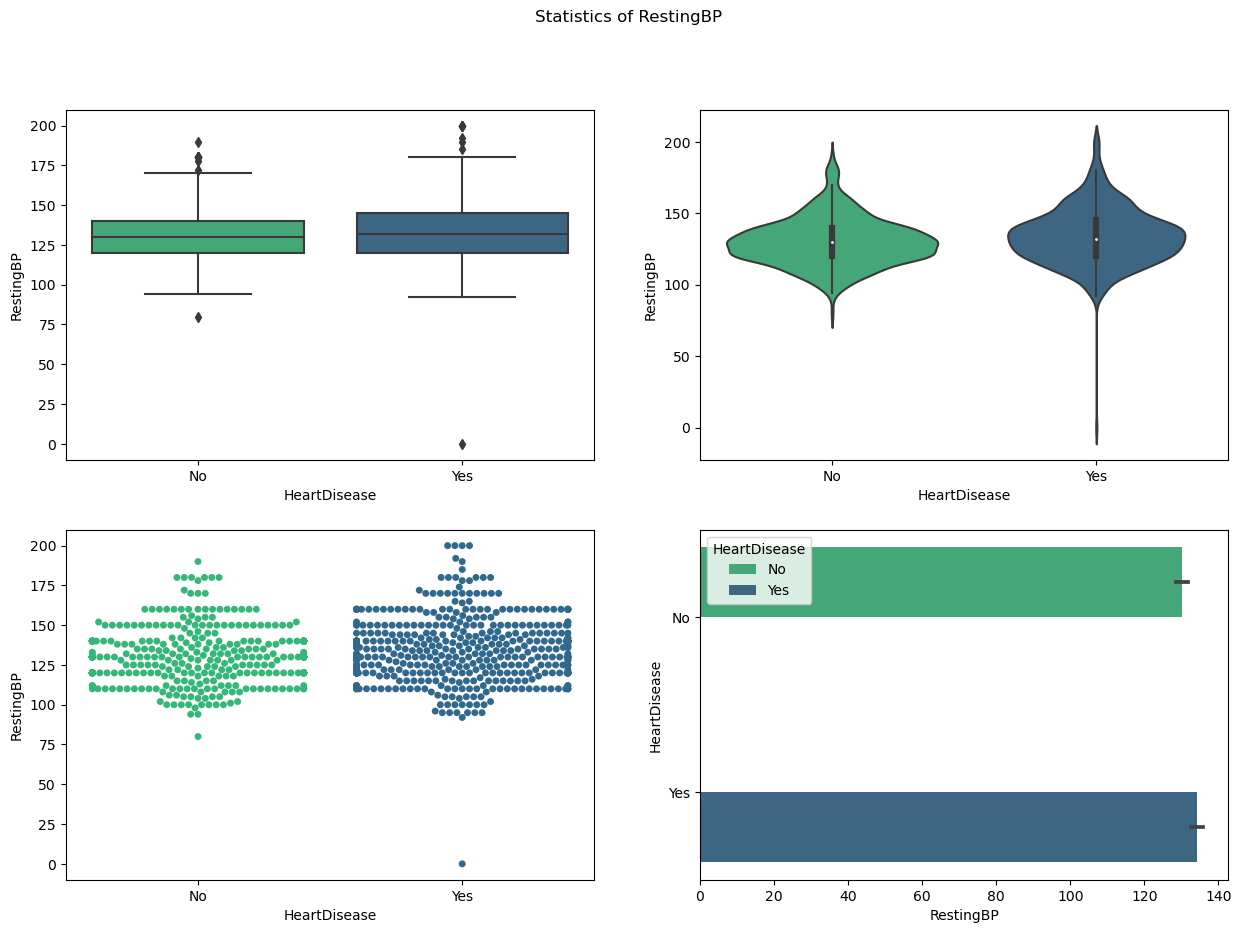

In [52]:
plot_stats(continuous[1])

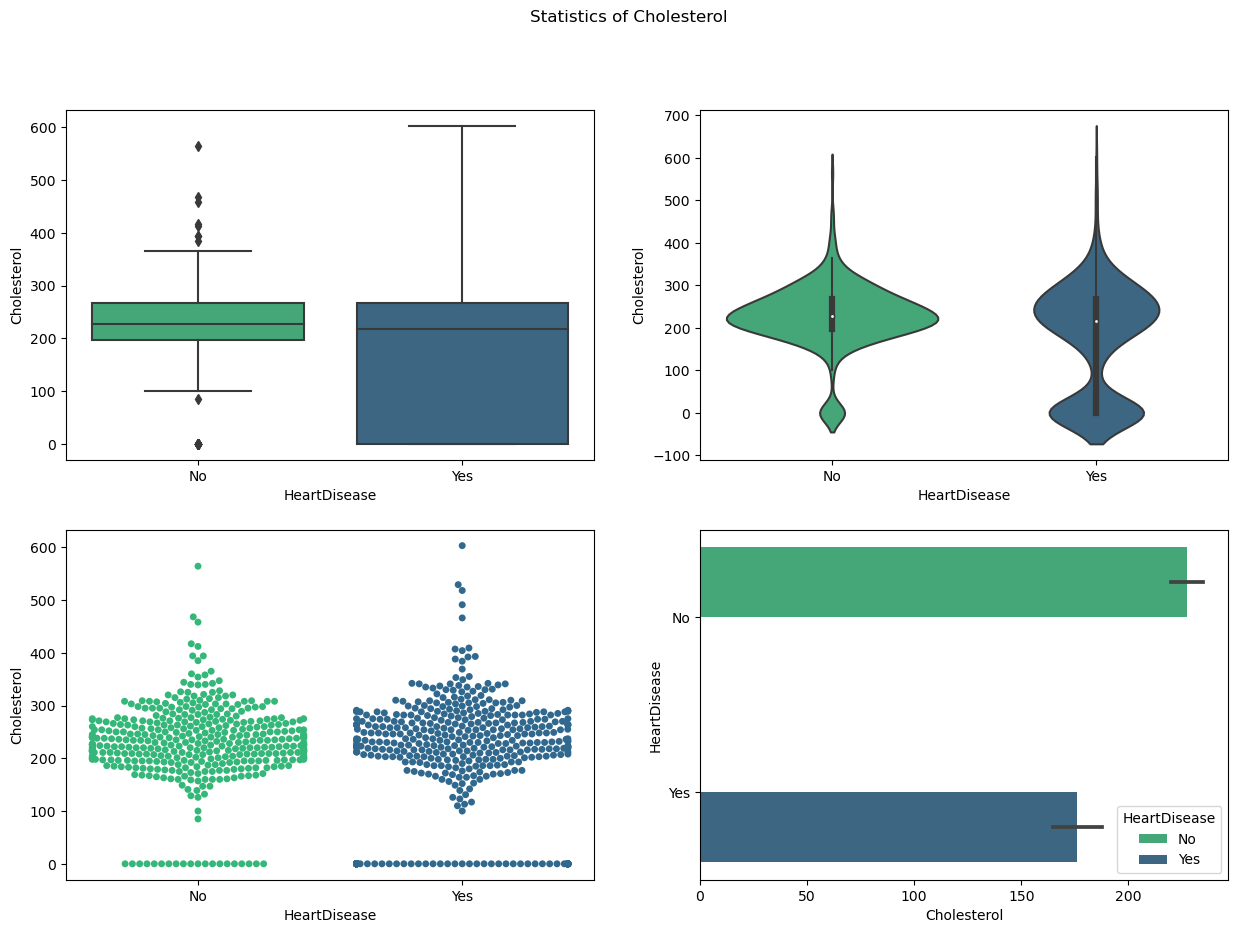

In [53]:
plot_stats(continuous[2])

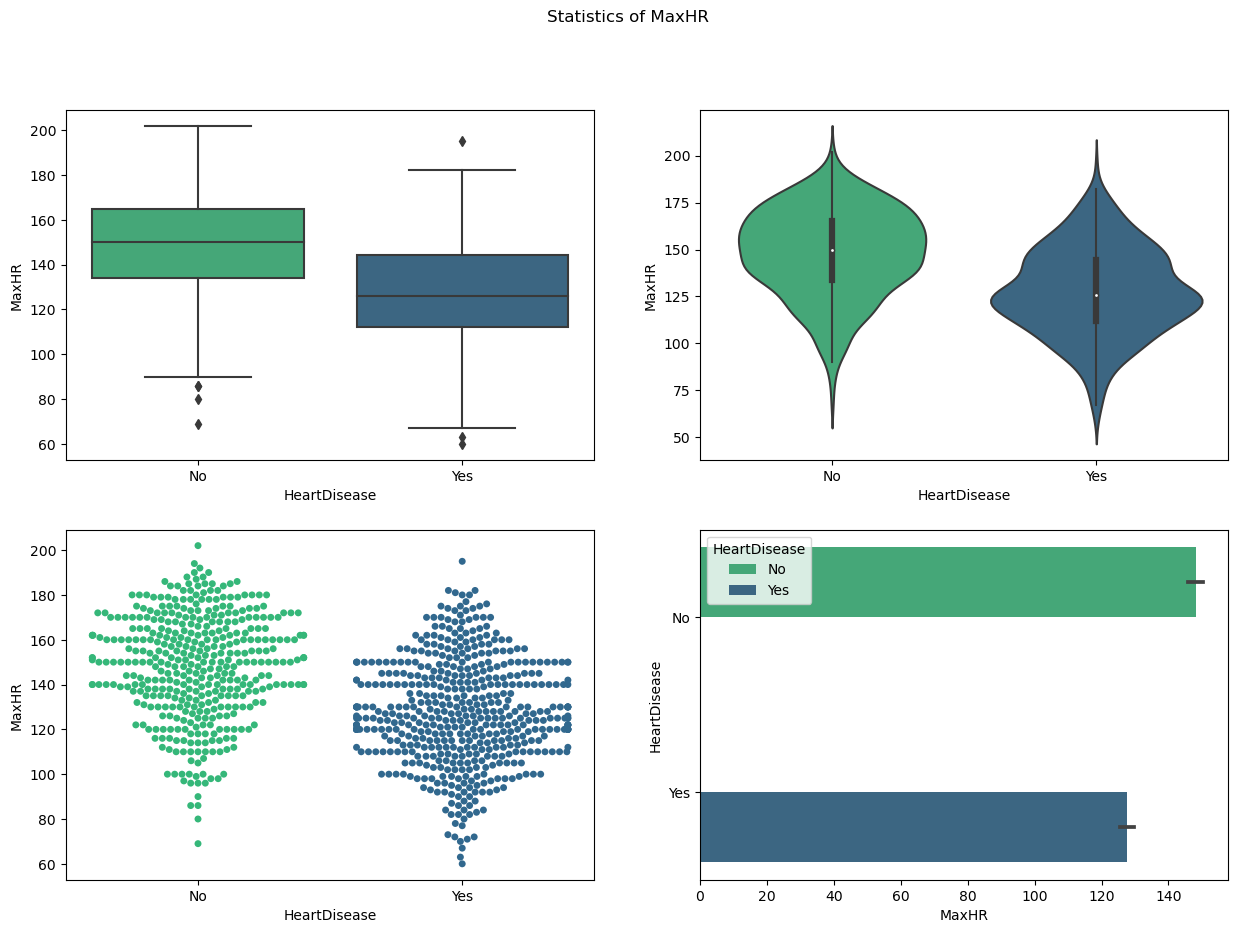

In [54]:
plot_stats(continuous[3])

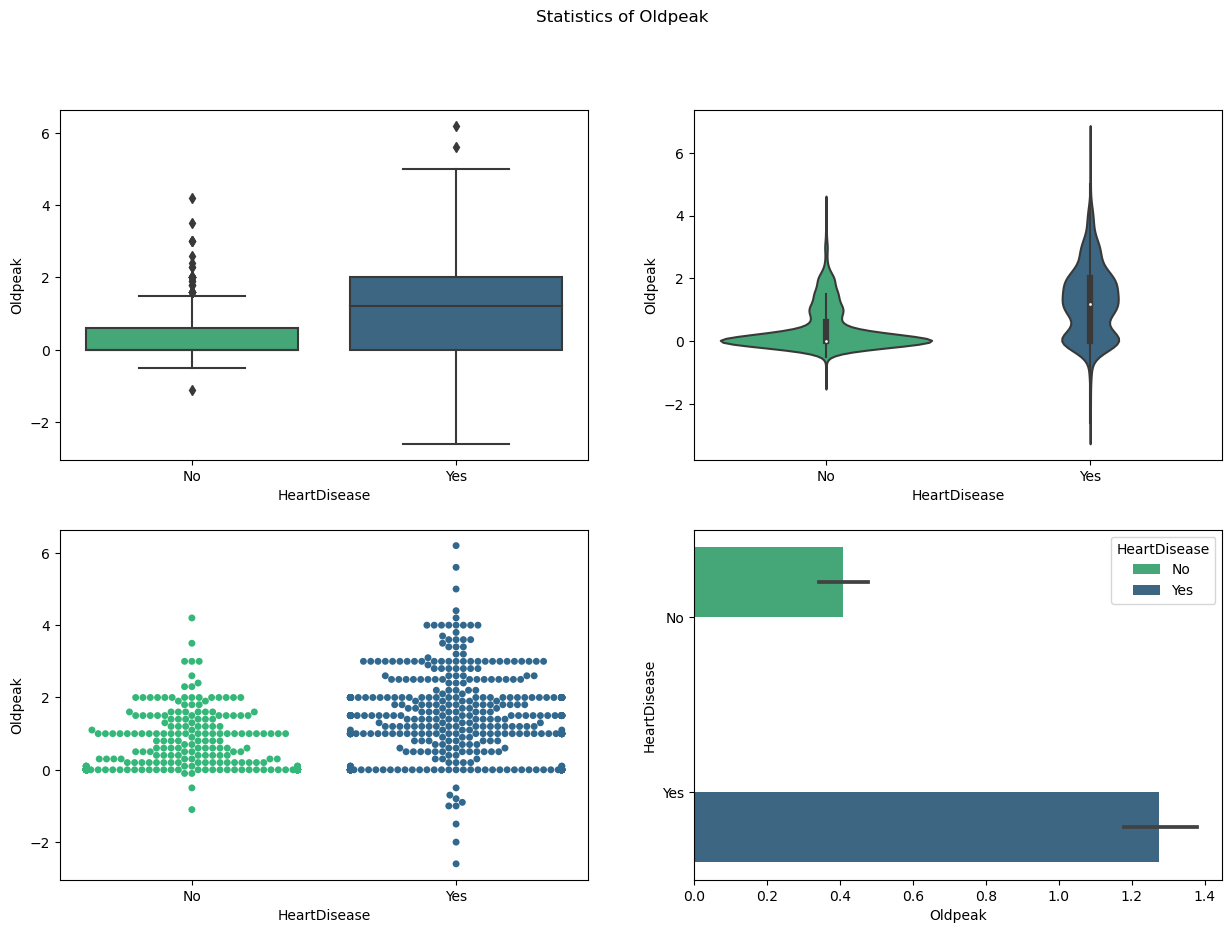

In [55]:
plot_stats(continuous[4])

#### KDE with Facet

In [72]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="HeartDisease", aspect=4, palette="rainbow"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

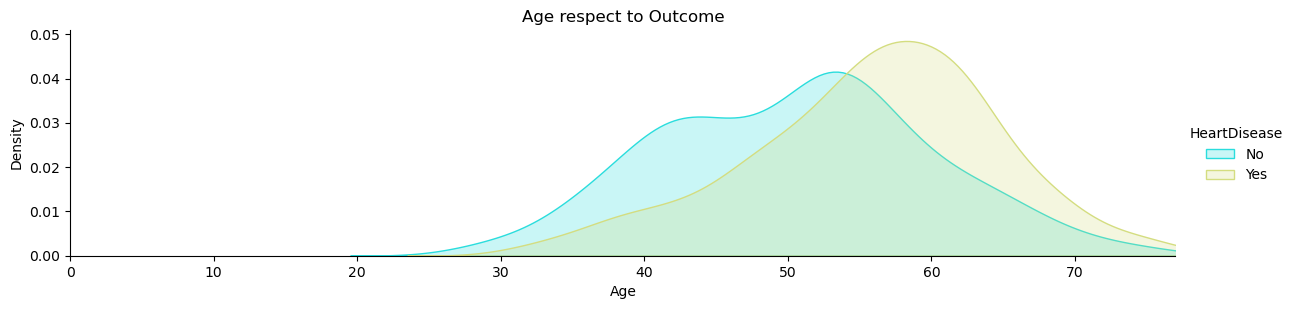

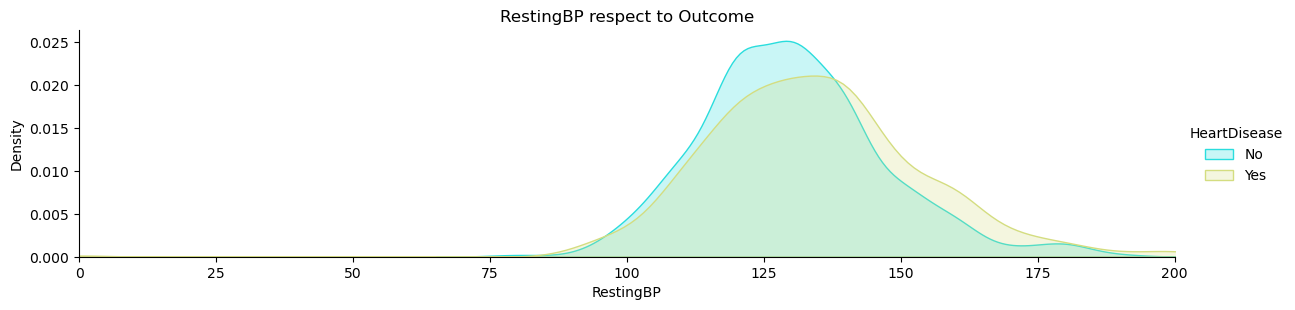

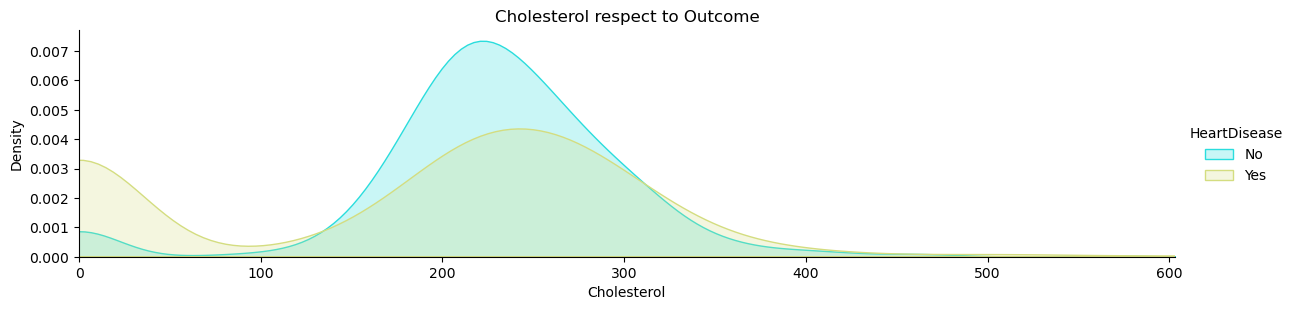

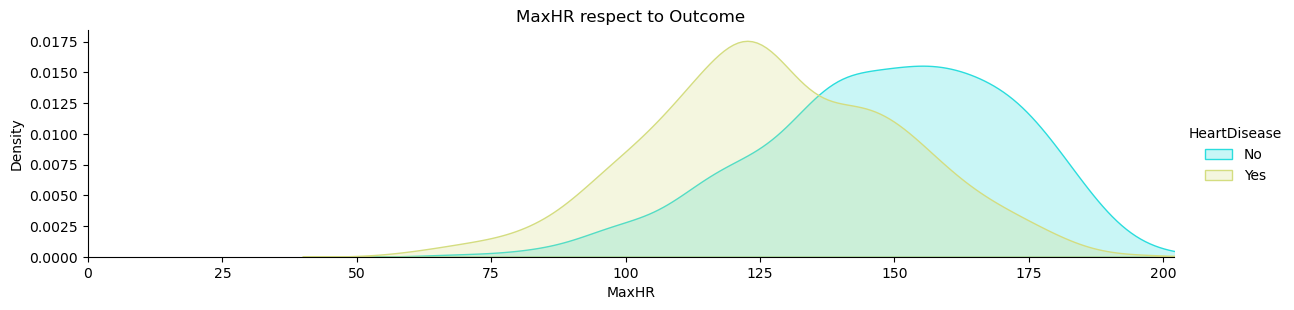

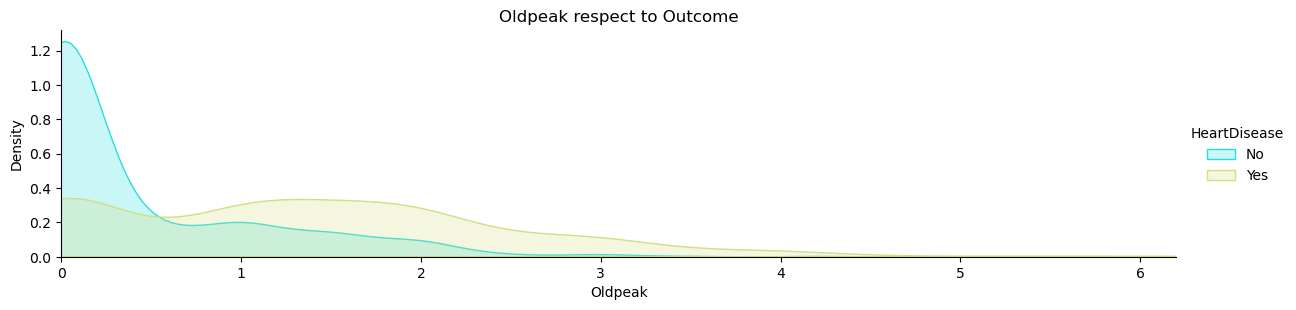

(None, None, None, None, None)

In [73]:
plot_kde(continuous[0]), plot_kde(continuous[1]),plot_kde(continuous[2]),plot_kde(continuous[3]),plot_kde(continuous[4])

#### Pairplot

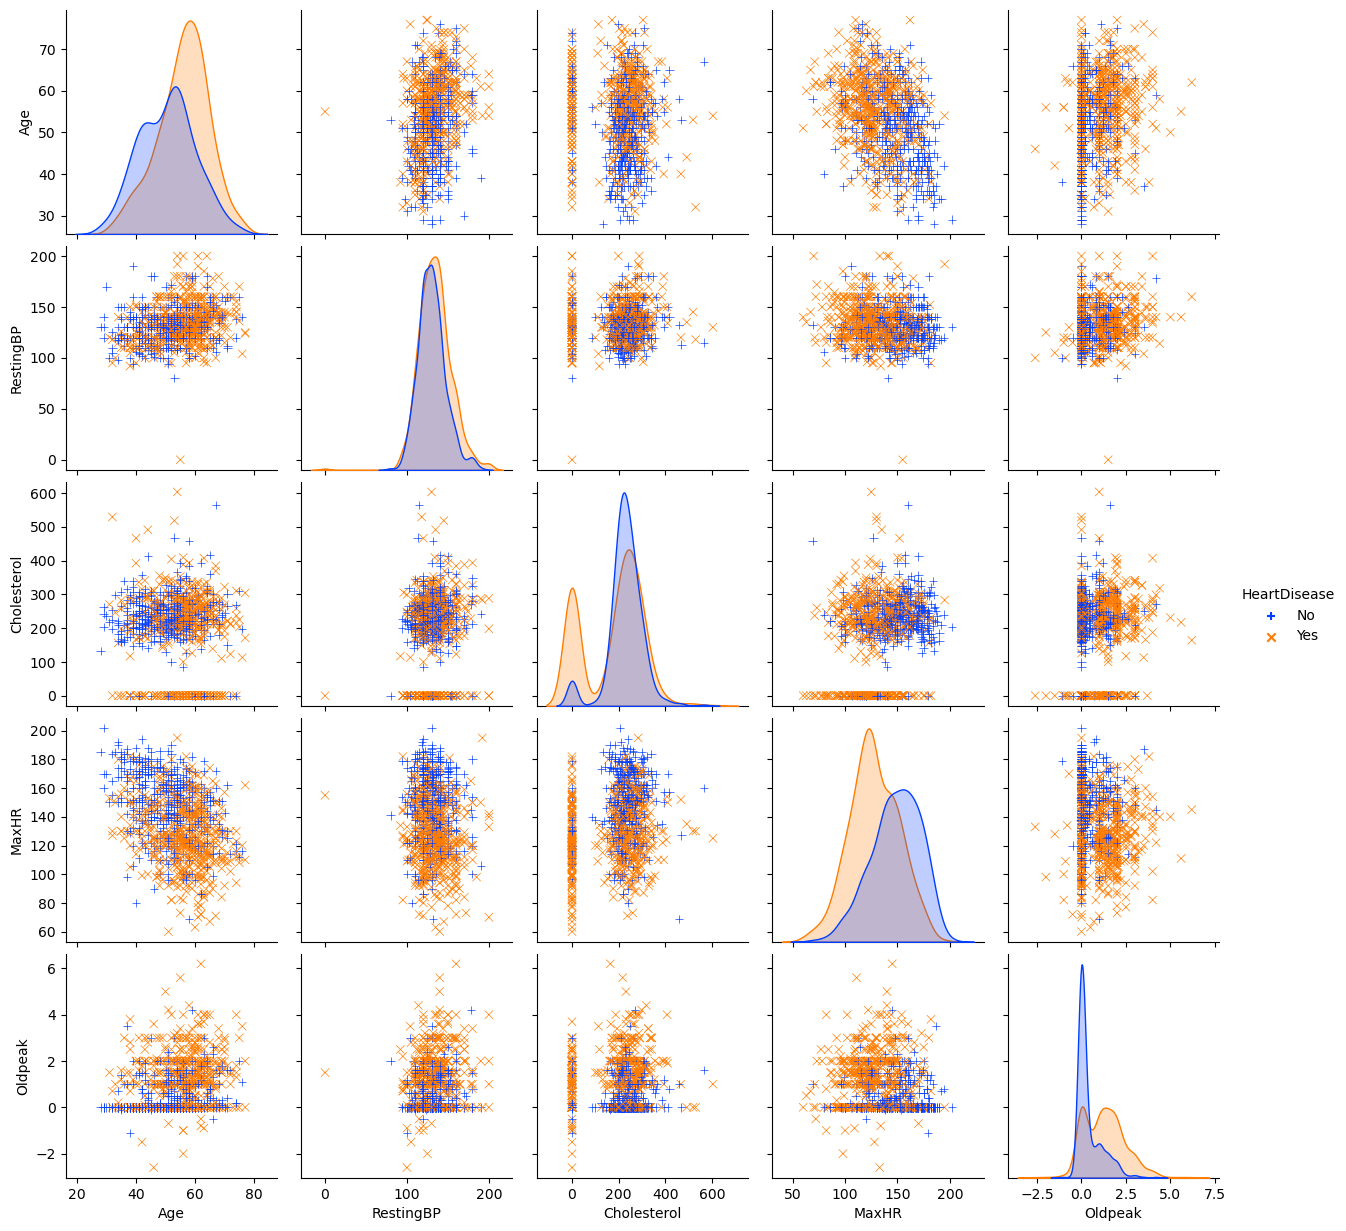

In [69]:
sns.pairplot(
    df,
    hue="HeartDisease",
    x_vars=continuous,
    markers=["+", "x"],
    palette="bright",
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

<div class="alert alert-block alert-info">
<b>Observation1 :</b> People with higher oldpeak tend to have exercise engima. There is no obvious trend with other categorical variables.</div>

<div class="alert alert-block alert-info">
<b>Observation2 :</b> Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference looks small.</div>

<div class="alert alert-block alert-info">
<b>Observation3 :</b> Most of heart disease Patients have age between 55 and 65.</div>

<div class="alert alert-block alert-info">
<b>Observation4 :</b> Most patients with 0 oldpeak, don't have Heart disease and 
Most tested Patients have RestingBP between 120 and 150.</div>

<span style="color:BLue">Feature Engineering</span>

In [82]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)

for col in ['ChestPainType', 'RestingECG', 'ST_Slope']:
    frequency_encoding(df, col)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,173,140,289,0,552,172,N,0.0,395,0
1,49,F,203,160,180,0,552,156,N,1.0,460,1
2,37,M,173,130,283,0,178,98,N,0.0,395,0
3,48,F,496,138,214,0,552,108,Y,1.5,460,1
4,54,M,203,150,195,0,552,122,N,0.0,395,0


In [83]:
df.Sex.replace(to_replace={"F": 0, "M": 1}, inplace=True)
df.FastingBS.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.ExerciseAngina.replace(to_replace={"N": 0, "Y": 1}, inplace=True)
df.HeartDisease.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,552,172,0,0.0,395,0
1,49,0,203,160,180,0,552,156,0,1.0,460,1
2,37,1,173,130,283,0,178,98,0,0.0,395,0
3,48,0,496,138,214,0,552,108,1,1.5,460,1
4,54,1,203,150,195,0,552,122,0,0.0,395,0


#### Correlation

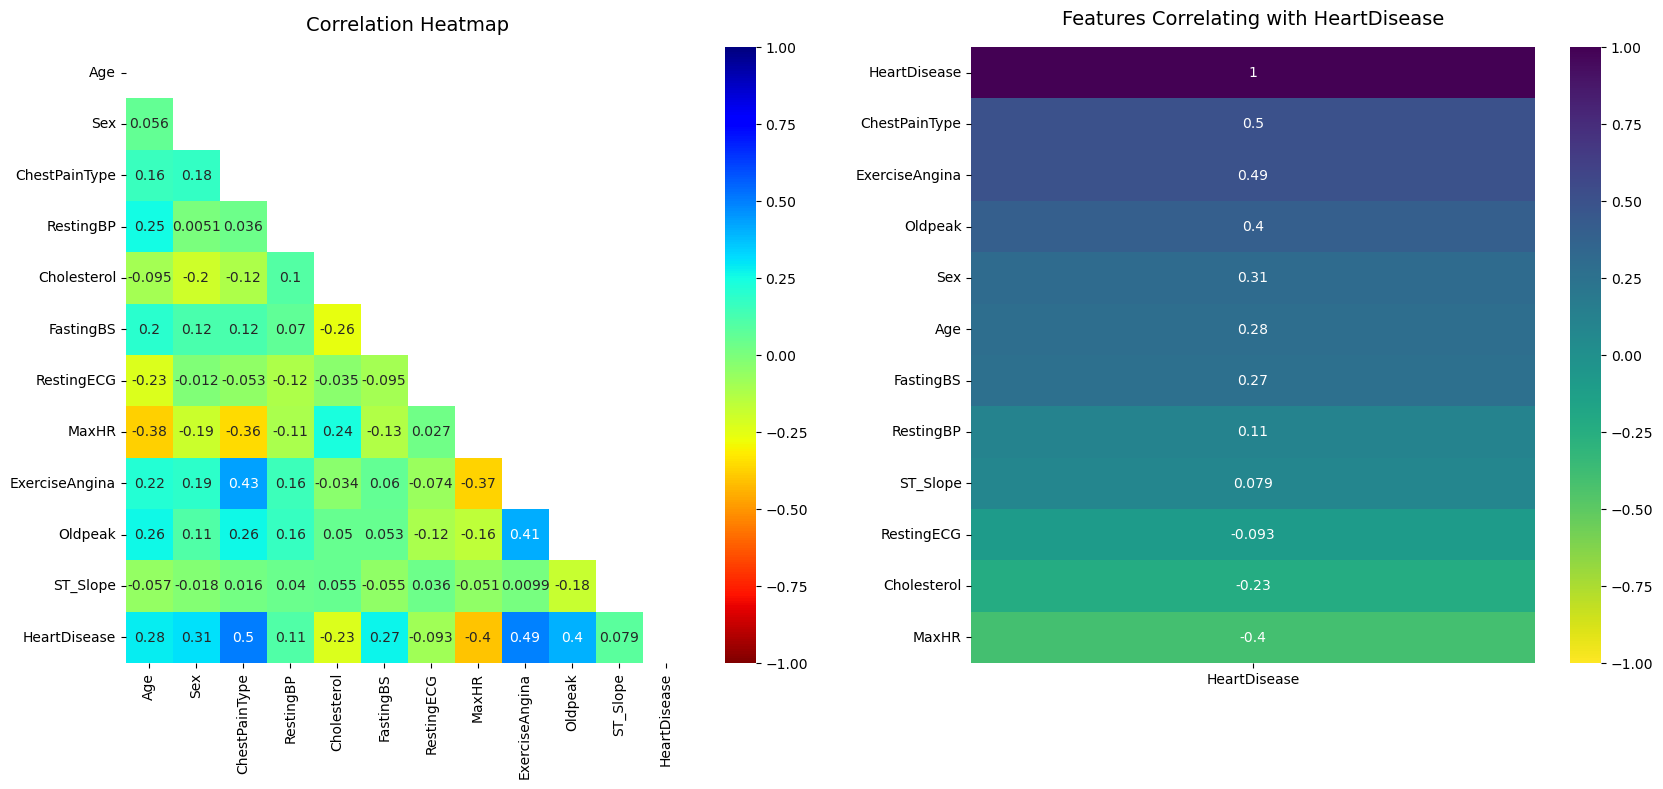

In [86]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8)) 
resign_corr = df.corr() 
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="jet_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)

heatmap = sns.heatmap(
    resign_corr[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  
heatmap.set_title(
    "Features Correlating with HeartDisease",
    fontdict={"fontsize": 14},
    pad=16,  
)
plt.show()

##### Imbalance OR Balanced data

<Axes: xlabel='HeartDisease', ylabel='count'>

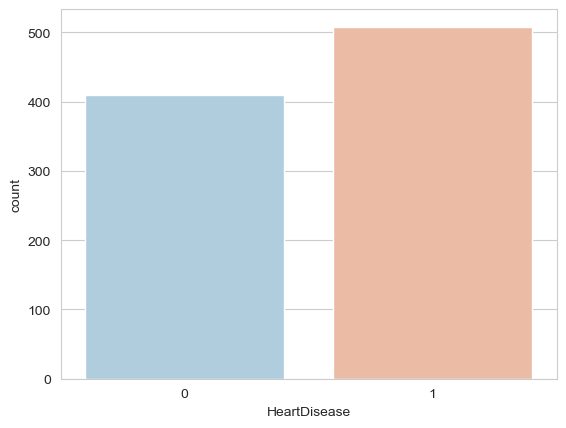

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

<div class="alert alert-block alert-success">
<b>Success :</b> Yes = 55% No = 45% So Balanced Dataset.</div>

#### Split And Scale

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[columns_to_scale]=standardScaler.fit_transform(df[columns_to_scale])

In [90]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,173,0.410909,0.825070,0,552,1.382928,0,-0.832432,395,0
1,-0.478484,0,203,1.491752,-0.171961,0,552,0.754157,0,0.105664,460,1
2,-1.751359,1,173,-0.129513,0.770188,0,178,-1.525138,0,-0.832432,395,0
3,-0.584556,0,496,0.302825,0.139040,0,552,-1.132156,1,0.574711,460,1
4,0.051881,1,203,0.951331,-0.034755,0,552,-0.581981,0,-0.832432,395,0


In [91]:
y= df['HeartDisease']
X = df.drop(['HeartDisease'],axis=1)

### KNeighbors Classifier

In [94]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

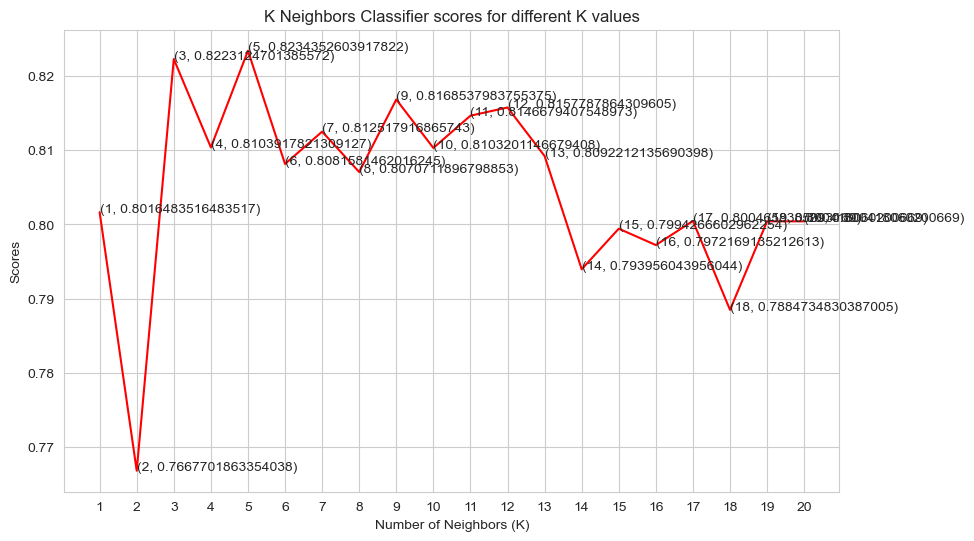

In [101]:
plt.figure(figsize=(10, 6))  # Set the figure size here (width=10, height=6)

plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], (i, knn_scores[i - 1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

plt.show()

In [103]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [104]:
score.mean()

0.8157787864309605

### Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8386048733874821

In [118]:
joblib.dump(standardScaler, 'standardScaler.pkl')

['standardScaler.pkl']

In [111]:
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

randomforest_classifier = RandomForestClassifier(n_estimators=10)

# Train the model
randomforest_classifier.fit(X_train, y_train)

# Save the trained model
joblib.dump(randomforest_classifier, 'randomforest_model.pkl')

['randomforest_model.pkl']

<hr>

<code style="background:yellow;color:black">Predict With New Sample:</code>

In [128]:
import joblib
import numpy as np

# Load the trained model
loaded_model = joblib.load('randomforest_model.pkl')

# Load the saved scaler fitted on 5 features
loaded_scaler = joblib.load('standardScaler.pkl')

# New data for prediction - 5 values to scale
new_data_to_scale = np.array([[12,110,289,172,2.0]])  # Replace [...] with 5 new data entries

# Scale the 5 values in the new data using the loaded scaler
scaled_new_data_partial = loaded_scaler.transform(new_data_to_scale)

# Another set of 6 values for prediction
additional_data = np.array([[1,173,0,552,0,395]])  # Replace [...] with 6 new data entries

# Concatenate the scaled 5 values with the additional 6 values
new_data_combined = np.concatenate((scaled_new_data_partial, additional_data), axis=1)

# Predict with the combined data using the trained model
predicted_values = loaded_model.predict(new_data_combined)
if predicted_values !=0:
    print("Yes, Heart disease")
else:
    print("No, Don't Panic")

Yes, Heart disease


### Decsion Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Fit the model
decision_tree_classifier.fit(X_train, y_train)

# Predict using the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = decision_tree_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7880434782608695


In [107]:
# Cross-validation (if needed)
score = cross_val_score(decision_tree_classifier, X, y, cv=10)
print(f"Mean Cross-Validation Score: {score.mean()}")

Mean Cross-Validation Score: 0.7808289536550406


Confusion Matrix:
[[64 13]
 [26 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        77
           1       0.86      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



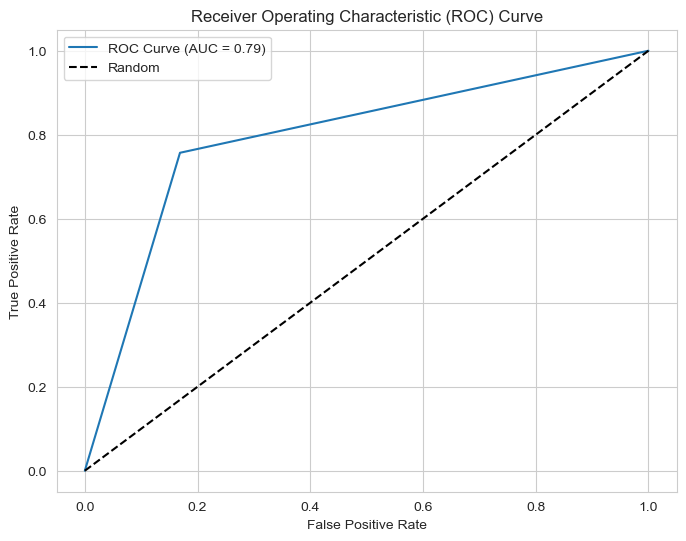

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test contains true labels and y_pred contains predicted labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


|KNN|DecisionTree|RandomForest|
|------|------|------|
|Score    |Score      |Score    |
|0.81     |0.78     |0.83     |

<code style="background:lightgreen;color:black"> ☑ Random forest model is best model for this data.</code>